# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
# Path to main folder
path = r'C:\Users\jmacs\Documents\Career Foundry Tasks\01-2024 Instacart Basket Analysis'

In [3]:
# Importing ords_prods_customers dataframe
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_since_last_order,frequency_flag,first_name,last_name,Gender,STATE,Age,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


# 03. Histogram (order hour of the day)

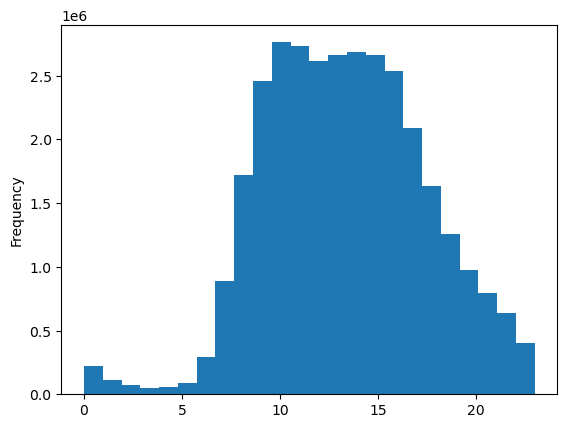

In [10]:
# creating histogram of order hour of the day
hist = ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows us the frequency of orders per hour. As expected, orders increase from 10 am to 4 pm. 

In [30]:
# saving the histogram to visualizations
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

# 04. Bar chart (loyalty flag)

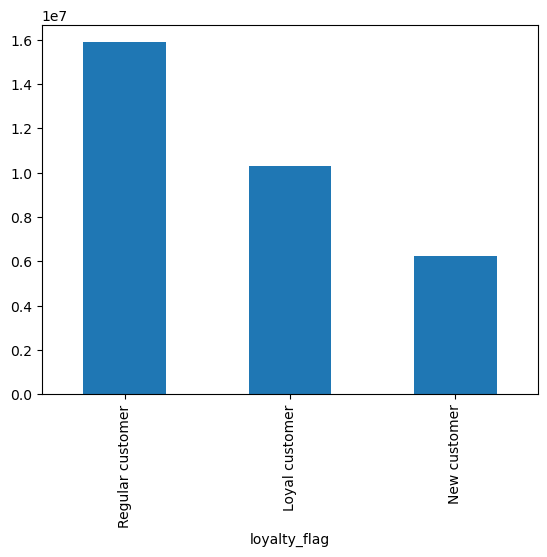

In [11]:
# creating bar chart for orders day of week
bar = ords_prods_custs['loyalty_flag'].value_counts().plot.bar()

In [31]:
# saving the bar chart to visualizations folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# 05. Line chart (prices and hour of the day)

In [5]:
# creating a random seed for sampling
np.random.seed(4)

In [6]:
# creating a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [7]:
# store %70 of the sample in dataframe big
big = ords_prods_custs[dev]

In [8]:
# store 30% of the sample in dataframe small 
small = ords_prods_custs[~dev]

In [9]:
# checking length of dataframe
len(ords_prods_custs)

32404859

In [10]:
# checking length of big and small dataframe (should equal the same as the original dataframe)
len(big) + len(small)

32404859

In [11]:
# creating a dataframe from the small sample with only prices and orders hour of the day
df_2 = small[['order_hour_of_day','prices']]

C:\Users\jmacs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jmacs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


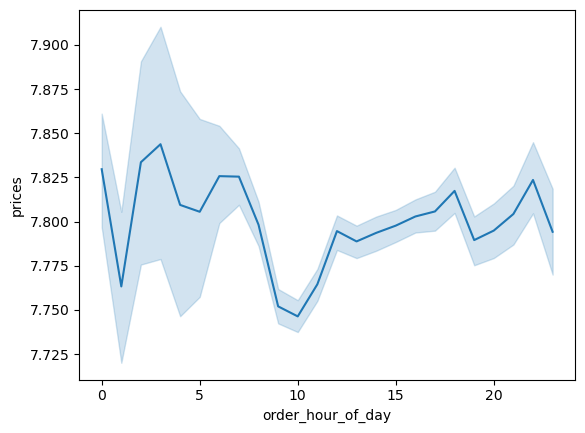

In [12]:
# line chart for prices and order hour of day
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [13]:
# saving the line chart to visualizations
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hod.png'))

In [14]:
# creating a dataframe from the small sample with only age and dependants
df_3 = small[['Age','dependants']]

C:\Users\jmacs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jmacs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


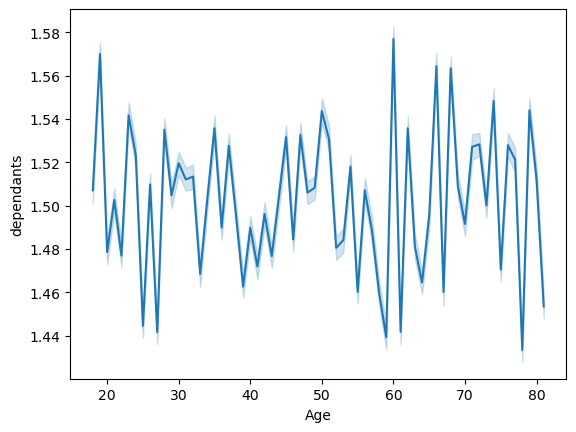

In [16]:
# line chart for age and dependants
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'dependants')

This chart shows no connection between age and number of dependents. The max number of dependents is 3. 

In [17]:
# saving the line chart to visualizations
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

# 06. Scatterplot (age and income)

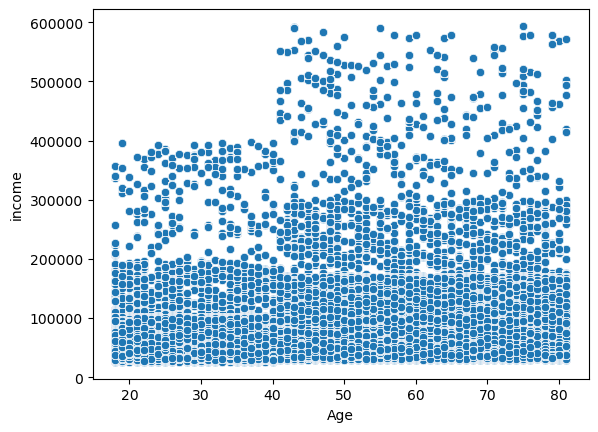

In [18]:
# creating a scatterplot
scatter = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_custs)

The scatterplot shows there is a rise in income after the age of 40. Of course there is more users that remain in the lower to middle income. 

In [19]:
# saving the scatterplot chart to visualizations
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))